2018-04-06-00_00_2018-04-06-23_59_Sentinel-2_L2A_NDWI.tiff
2018-10-13-00_00_2018-10-13-23_59_Sentinel-2_L2A_NDWI.tiff
2019-09-05-00_00_2019-09-05-23_59_Sentinel-2_L2A_NDWI.tiff
2020-09-14-00_00_2020-09-14-23_59_Sentinel-2_L2A_NDWI.tiff
2021-09-09-00_00_2021-09-09-23_59_Sentinel-2_L2A_NDWI.tiff
2022-10-07-00_00_2022-10-07-23_59_Sentinel-2_L2A_NDWI.tiff
2023-09-27-00_00_2023-09-27-23_59_Sentinel-2_L2A_NDWI.tiff
[1.953, 1.5995, 1.5774, 1.4857, 1.4055, 1.3789, 1.3665]


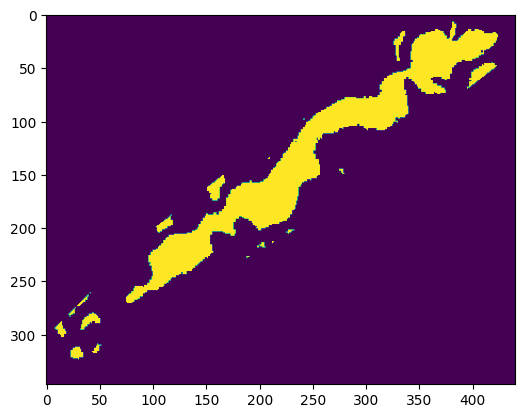

In [7]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import os

water_pixels = []
pixel_size = 10

# Read the raster data
for (dirpath, dirnames, filenames) in os.walk('data'):
    for filename in sorted(filenames):
        if filename.endswith('.tiff'):
            with rasterio.open('data/' + filename) as src:
                ndwi = src.read(3)
                # print(src.meta)
                ndwi[ndwi == 1] = np.nan
                # print(ndwi.shape)
                # print(ndwi.min(), ndwi.max())
                # print(ndwi.mean())
                water = ndwi > 0.6
                # print(water)
                plt.imshow(water)
                print(filename)
                water_pixels.append(np.count_nonzero(water == True) * pixel_size * pixel_size / 1000000)

print(water_pixels)